In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import umap
from matplotlib import cm

In [2]:
# Y label will be varient coloring
wuhan_path = '../wuhan_generalization_experements/embeddings/wuhan_adj_mat_encoding.npy'
alpha_path = '../wuhan_generalization_experements/embeddings/alpha_adj_mat_encoding.npy'
beta_path = '../wuhan_generalization_experements/embeddings/beta_adj_mat_encoding.npy'
delta_path = '../wuhan_generalization_experements/embeddings/delta_adj_mat_encoding.npy'
eta_path = '../wuhan_generalization_experements/embeddings/eta_adj_mat_encoding.npy'
omicron_path = '../wuhan_generalization_experements/embeddings/omicron_ba1_adj_mat_encoding.npy'
omicron2_path = '../wuhan_generalization_experements/embeddings/omicron_ba2_adj_mat_encoding.npy'

# todo add omicron ba2!

def unpack(embedding_path,varient_number):
    dataset = np.load(embedding_path ,allow_pickle=True)
    dataset= dataset[~np.isnan(dataset).any(axis=1)]
    X = dataset[:,:-2]
    X= X[~np.isnan(X).any(axis=1)] #Drop nans here.
    # Add extra column for varient type..
    a = np.ones(len(X))*varient_number
    a = np.expand_dims(a, axis=1)
    X = np.hstack((X, a))
    return X

wuhan = unpack(wuhan_path,0)
alpha = unpack(alpha_path,1)
beta = unpack(beta_path,2)
delta = unpack(delta_path,3)
eta = unpack(eta_path,4)
omicron = unpack(omicron_path,5)
omicron2 = unpack(omicron2_path,6)

X = np.vstack((wuhan,alpha,beta,delta,eta,omicron,omicron2))
coloring = X[:,-1]
X = X[:,:-1]

In [3]:
reducer = umap.UMAP()
Y = reducer.fit_transform(X)

/home/ozkilim/.local/lib/python3.8/site-packages/matplotlib/collections.py:1084: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


[]


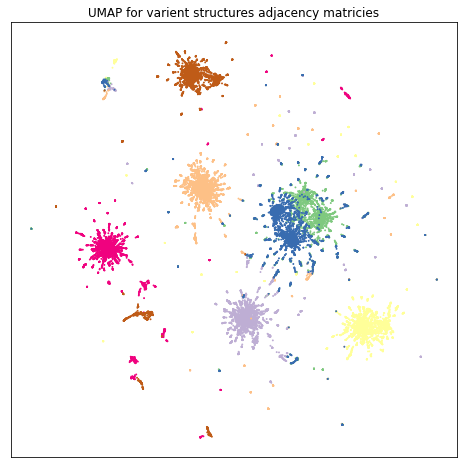

In [4]:
fig = plt.figure(figsize=(8,8))
colors = cm.get_cmap('Accent')

col_vec = []
for i in coloring:
    col = colors(int(i))
    col_vec.append(col)

scatter = plt.scatter(Y[:,0], Y[:,1], c=np.array(col_vec), s = 0.8)
plt.title("UMAP for varient structures adjacency matricies")

plt.xticks([])
plt.yticks([])

names_vec = ["Wuhan","Alpha","Beta","Delta","Eta","Omicron BA1","Omicron BA2"]

print(scatter.legend_elements()[0]) # cannot work with custom values
# plt.legend(handles=scatter.legend_elements()[0], labels=names_vec)
# Clusters? color by phenotype?... interesting if true... do coloring more correctly...
fig.savefig("../reasults_figs/UMAP_all_structs.png",facecolor='white', transparent=False,bbox_inches='tight')

In [17]:
# Now for one hot encoding..
wuhan_path = '../wuhan_generalization_experements/embeddings/wuhan_one_hot_encoding.npy'
alpha_path = '../wuhan_generalization_experements/embeddings/alpha_one_hot_encoding.npy'
beta_path = '../wuhan_generalization_experements/embeddings/beta_one_hot_encoding.npy'
delta_path = '../wuhan_generalization_experements/embeddings/delta_one_hot_encoding.npy'
eta_path = '../wuhan_generalization_experements/embeddings/eta_one_hot_encoding.npy'
omicron_path = '../wuhan_generalization_experements/embeddings/omicron_ba1_one_hot_encoding.npy'
omicron2_path = '../wuhan_generalization_experements/embeddings/omicron_ba2_one_hot_encoding.npy'


def unpack(embedding_path,varient_number):
    dataset = np.load(embedding_path ,allow_pickle=True)
    dataset= dataset[~np.isnan(dataset).any(axis=1)]
    X = dataset[:,:-2]
    X= X[~np.isnan(X).any(axis=1)] #Drop nans here.
    # Add extra column for varient type..
    a = np.ones(len(X))*varient_number
    a = np.expand_dims(a, axis=1)
    X = np.hstack((X, a))
    return X

wuhan = unpack(wuhan_path,0)
alpha = unpack(alpha_path,1)
beta = unpack(beta_path,2)
delta = unpack(delta_path,3)
eta = unpack(eta_path,4)
omicron = unpack(omicron_path,5)
omicron2 = unpack(omicron2_path,6)

X = np.vstack((wuhan,alpha,beta,delta,eta,omicron,omicron2))
coloring = X[:,-1]
X = X[:,:-1]

reducer = umap.UMAP()
Y = reducer.fit_transform(X)


<Figure size 576x576 with 0 Axes>

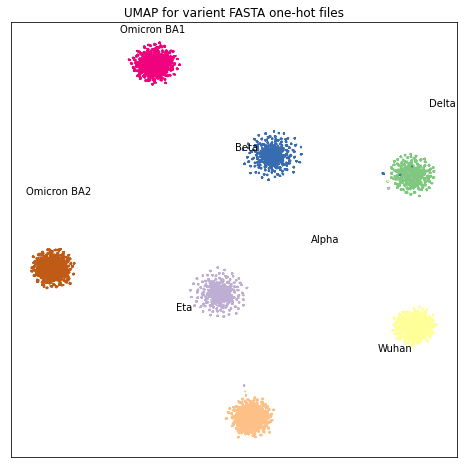

In [18]:
fig = plt.figure(figsize=(8,8))

fig = plt.figure(figsize=(8,8))
colors = cm.get_cmap('Accent')
col_vec = []
for i in coloring:
    col = colors(int(i))
    col_vec.append(col)


scatter = plt.scatter(Y[:,0], Y[:,1], c = col_vec, s = 0.8)
plt.title("UMAP for varient FASTA one-hot files")

plt.xticks([])
plt.yticks([])

#make ledgend by coling..
names_vec = ["Wuhan","Alpha","Beta","Delta","Eta","Omicron"]


plt.text(17, -5, 'Wuhan', ha='center', va='center', color='black')
plt.text(12.5, 3, 'Alpha', ha='center', va='center', color='black')
plt.text(7.5, 9.8, 'Beta', ha='center', va='center', color='black')
plt.text(20, 13, 'Delta', ha='center', va='center', color='black')
plt.text(3.5, -2, 'Eta', ha='center', va='center', color='black')
plt.text(1.5, 18.5, 'Omicron BA1', ha='center', va='center', color='black')
plt.text(-4.5, 6.5, 'Omicron BA2', ha='center', va='center', color='black')

# Plot varient names onto fig..
# plt.legend(handles=scatter.legend_elements()[0], labels=names_vec)
# Clusters? color by phenotype?... interesting if true... do coloring more correctly...
fig.savefig("../reasults_figs/UMAP_FASTA.png",facecolor='white', transparent=False,bbox_inches='tight')

In [14]:
# Y label will be varient coloring
wuhan_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/wuhan_adj_mat_encoding.npy'
alpha_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/alpha_adj_mat_encoding.npy'
beta_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/beta_adj_mat_encoding.npy'
delta_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/delta_adj_mat_encoding.npy'
eta_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/eta_adj_mat_encoding.npy'
omicron_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/OmicronBA1_adj_mat_encoding.npy'

def unpack(embedding_path,varient_number):
    dataset = np.load(embedding_path ,allow_pickle=True)
    dataset= dataset[~np.isnan(dataset).any(axis=1)]
    X = dataset[:,:-2]
    X= X[~np.isnan(X).any(axis=1)] #Drop nans here.
    # Add extra column for varient type..
    a = np.ones(len(X))*varient_number
    a = np.expand_dims(a, axis=1)
    X = np.hstack((X, a))
    return X

wuhan = unpack(wuhan_path,0)

X = wuhan
coloring = X[:,-1]
X = X[:,:-1]

reducer = umap.UMAP()
Y = reducer.fit_transform(X)

fig = plt.figure(figsize=(8,8))

scatter = plt.scatter(Y[:,0], Y[:,1], c = coloring, s = 0.8)
plt.title("UMAP for varient structures adjacency matricies")

plt.xticks([])
plt.yticks([])

#make ledgend by coling..
names_vec = ["Wuhan","Alpha","Beta","Delta","Eta","Omicron"]

plt.legend(handles=scatter.legend_elements()[0], labels=names_vec)
# Clusters? color by phenotype?... interesting if true... do coloring more correctly...
# fig.savefig("./reasults_figs/UMAP_all_structs.png",facecolor='white', transparent=False)



# see if 201 clusters found?...... this would mean ... 

# look at the mutant matrix and binarize it to see how it would look! for each position!... 

# 2 insteresting sub clusters? what is this split?...
# Now K means ontop of this to see if we have around 201 clusters? that would mean inputs going in are very similar between all muts of each position?...

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/wuhan_adj_mat_encoding.npy'

In [ ]:
# plot our own version of the matrix and see how it looks... this could give real insight!

# If so then it may be clear what pattern is being learnt...


